<a href="https://colab.research.google.com/github/Rickkk2/TestDataScientistIntern/blob/main/Data_Scientist_internship_technical_test_Wiremind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First steps**




In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#!pip install category_encoders
#import category_encoders as ce

import seaborn as sns

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from scipy.stats import skew
from scipy.stats import kurtosis

In [3]:
# Read dataset and open as dataframe
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset.csv')
df.head(10)

,DocumentRatingSource,FlownYear,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,DestinationCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue
0,XXXX,2017,NOVEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,RC,21.0,1,15.050
1,XXXX,2017,SEPTEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,13.2,1,9.460
2,XXXX,2017,SEPTEMBER,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,ZZZ,YYY,X,RWCBA,ZW,15.6,1,9.160
3,XXXX,2017,OCTOBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,3.0,1,2.150
4,XXXX,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,12.0,1,17.080
5,XXXX,2017,OCTOBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,4.2,1,5.980
6,XXXX,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,RU,7.2,1,10.250
7,XXXX,2017,SEPTEMBER,VBTDDVB,VBTDW0QNSHVLXPOOMDT,JNV,PJMIV5OVXKAFPJMDKYSQRCHI,JNV,ZZZ,YYY,Y,RWCBA,B2324,30.3,1,274.021
8,XXXX,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,0.3,1,0.430
9,XXXX,2017,NOVEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,RU,9.9,1,14.090


In [4]:
for i in df:
  print("Variable " + i + " has " + str(df[i].nunique()) + " unique values")

Variable DocumentRatingSource has 6 unique values
Variable FlownYear has 1 unique values
Variable FlownMonth has 3 unique values
Variable AgentCode has 679 unique values
Variable AgentName has 664 unique values
Variable POS has 147 unique values
Variable POSCountryName has 62 unique values
Variable OriginCode has 144 unique values
Variable DestinationCode has 1 unique values
Variable CargoType has 3 unique values
Variable ProductCode has 18 unique values
Variable SpecialHandlingCodeList has 552 unique values
Variable CommodityCode has 222 unique values
Variable ChargeableWeight has 2358 unique values
Variable Pieces has 292 unique values
Variable Revenue has 5475 unique values


We assume that the variable *DocumentRatingSource* is not relevant to our analysis, as it does not appear in the list provided and does not seem related to the study. Also, *FlownYear* and *DestinationCode* have only one value, so they do not affect the analysis. We remove the three variables.

In [5]:
df = df.drop(columns=['DocumentRatingSource', 'FlownYear', 'DestinationCode'])
df.head(10)

,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue
0,NOVEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,RC,21.0,1,15.050
1,SEPTEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,ZW,13.2,1,9.460
2,SEPTEMBER,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,YYY,X,RWCBA,ZW,15.6,1,9.160
3,OCTOBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,ZW,3.0,1,2.150
4,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,YYY,X,RWCBA,BW,12.0,1,17.080
5,OCTOBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,YYY,X,RWCBA,BW,4.2,1,5.980
6,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,YYY,X,RWCBA,RU,7.2,1,10.250
7,SEPTEMBER,VBTDDVB,VBTDW0QNSHVLXPOOMDT,JNV,PJMIV5OVXKAFPJMDKYSQRCHI,JNV,YYY,Y,RWCBA,B2324,30.3,1,274.021
8,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,YYY,X,RWCBA,BW,0.3,1,0.430
9,NOVEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,YYY,X,RWCBA,RU,9.9,1,14.090


In [6]:
df.dtypes

FlownMonth                  object
AgentCode                   object
AgentName                   object
POS                         object
POSCountryName              object
OriginCode                  object
CargoType                   object
ProductCode                 object
SpecialHandlingCodeList     object
CommodityCode               object
ChargeableWeight           float64
Pieces                       int64
Revenue                    float64
dtype: object

In [7]:
print("There are " + str(df.select_dtypes(include=[np.number]).shape[1]) + " numeric and " + str(df.select_dtypes(exclude=[np.number]).shape[1]) + " categorical columns")

There are 3 numeric and 10 categorical columns


Analyzing the data, we noticed that the variable *FlownMonth* contains white spaces, so we made sure to remove them all.

In [8]:
df['FlownMonth'].unique()

array(['NOVEMBER ', 'SEPTEMBER', 'OCTOBER  '], dtype=object)

In [9]:
for i in df:
  if isinstance(df[i], str):
    df[i] = df[i].str.strip()

df['FlownMonth'].unique()

array(['NOVEMBER ', 'SEPTEMBER', 'OCTOBER  '], dtype=object)

Of the 3 numeric columns, 2 are discrete and 1 is continuous. Of the 10 categorical columns, they are all nominal. *FlownMonth* may appear ordinal, but the order or relative positions without corresponding years do not provide information by themselves.

Most Machine Learning algorithms cannot handle categorical variables, so we had tried using ordinal encoding and binary encoding. However, in the end we opted for LightGBM, which supports this type of variables. So, we changed the object type features to category.

In [10]:
numeric_variables = ['ChargeableWeight', 'Pieces' , 'Revenue']
categorical_variables = ['FlownMonth', 'AgentCode', 'AgentName', 'POS', 'POSCountryName', 'OriginCode', 'CargoType', 'ProductCode', 'SpecialHandlingCodeList', 'CommodityCode']

for i in categorical_variables:
    df[i] = df[i].astype('category')

df.dtypes

FlownMonth                 category
AgentCode                  category
AgentName                  category
POS                        category
POSCountryName             category
OriginCode                 category
CargoType                  category
ProductCode                category
SpecialHandlingCodeList    category
CommodityCode              category
ChargeableWeight            float64
Pieces                        int64
Revenue                     float64
dtype: object

**Missing values and outliers**



In [11]:
print("Let's check whether dataframe contains missing values: " + str(df.isnull().values.any()))

Let's check whether dataframe contains missing values: False


Text(0.5, 0, 'Minimum, first quartile, median, third quartile, and maximum value')

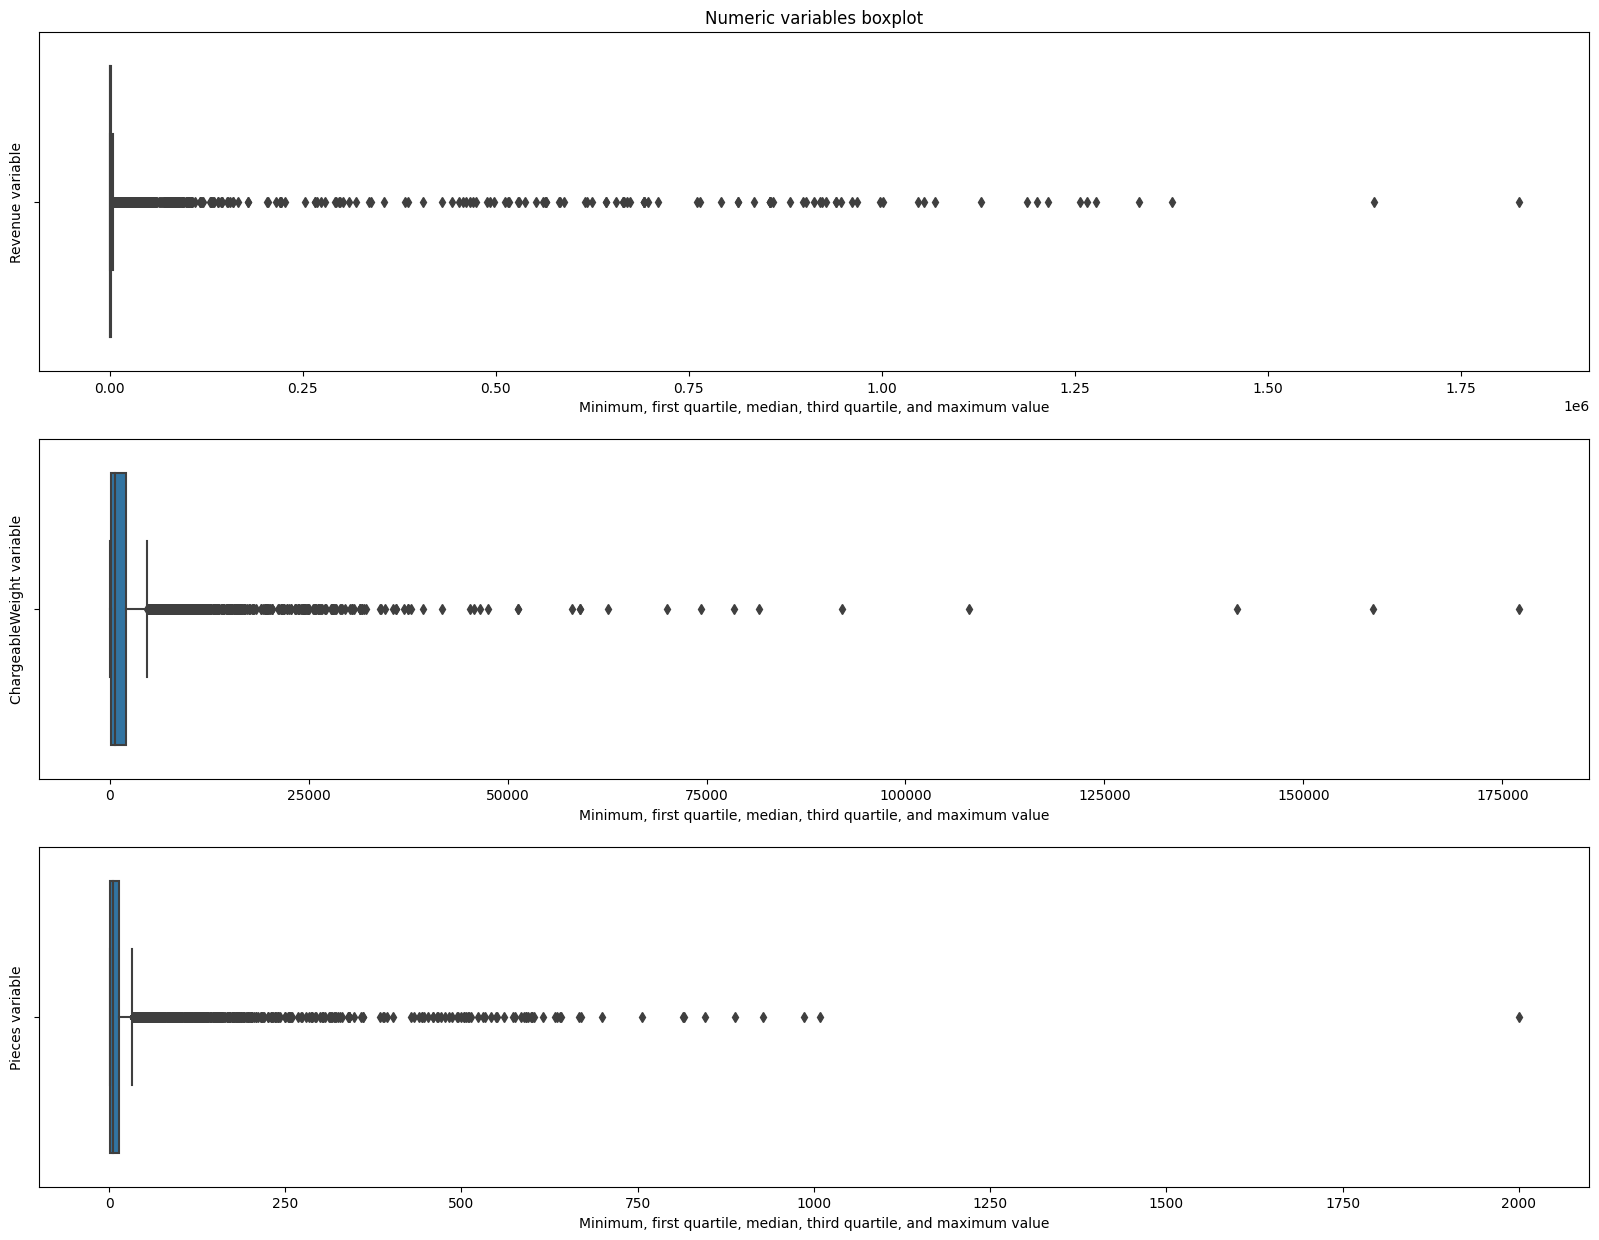

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(20, 15))
sns.boxplot(x=df["Revenue"], ax=ax1)
ax1.set_title('Numeric variables boxplot')
ax1.set_ylabel('Revenue variable')
ax1.set_xlabel('Minimum, first quartile, median, third quartile, and maximum value')
sns.boxplot(x=df["ChargeableWeight"], ax=ax2)
ax2.set_ylabel('ChargeableWeight variable')
ax2.set_xlabel('Minimum, first quartile, median, third quartile, and maximum value')
sns.boxplot(x=df["Pieces"], ax=ax3)
ax3.set_ylabel('Pieces variable')
ax3.set_xlabel('Minimum, first quartile, median, third quartile, and maximum value')

Graphically we cannot see much, so we are going to use a numerical approach.

In [13]:
# Function to find out outliers in a given variable using the Interquartile range (IQR) method
def getOutliers(column):
  percentile25 = column.quantile(0.25)
  percentile75 = column.quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + iqr*1.5
  lower_limit = percentile25 - iqr*1.5
  return df[(column < lower_limit) | (column > upper_limit)]

In [14]:
for i in numeric_variables:
  print("There are " + str(getOutliers(df[i]).shape[0]) + " outliers in " + i + ", which represents a "
        + str(getOutliers(df[i]).shape[0]/df[i].shape[0]*100) + "%")

There are 869 outliers in ChargeableWeight, which represents a 11.711590296495956%
There are 871 outliers in Pieces, which represents a 11.738544474393532%
There are 1078 outliers in Revenue, which represents a 14.528301886792452%


In [15]:
df[numeric_variables].describe()

,ChargeableWeight,Pieces,Revenue
count,7420.000000,7420.000000,7.420000e+03
mean,2276.926132,20.956873,1.353375e+04
std,5991.667675,67.731589,9.030922e+04
min,0.300000,1.000000,0.000000e+00
25%,177.000000,1.000000,1.849375e+02
50%,639.000000,5.000000,4.700550e+02
75%,1998.000000,14.000000,1.639300e+03
max,177078.000000,2000.000000,1.825425e+06


Problematic outliers to be removed represent measurement errors, data entry or processing errors, or poor sampling. However, this does not seem to be the case, since the character of the variable admits natural variations without any value looking incorrect.

# **Descriptive statistics**

Our objective is to analyze a client's willingness to pay based on the specifics of the shipment. Therefore, the dependent variable to be studied is *Revenue*.

## **Graphical representations**

For categorical variables, we will use bar charts and pie charts. In order to graphically represent these variables we will use the uncoded dataframe, *df*.

In [16]:
for i in categorical_variables:
  print("There are " + str(df[i].nunique()) + " unique ocurrences in " + i)

There are 3 unique ocurrences in FlownMonth
There are 679 unique ocurrences in AgentCode
There are 664 unique ocurrences in AgentName
There are 147 unique ocurrences in POS
There are 62 unique ocurrences in POSCountryName
There are 144 unique ocurrences in OriginCode
There are 3 unique ocurrences in CargoType
There are 18 unique ocurrences in ProductCode
There are 552 unique ocurrences in SpecialHandlingCodeList
There are 222 unique ocurrences in CommodityCode


From the above result it can be seen that shipments are sold in 147 cities in 62 countries. In addition, there are 3 cities from which transportation does not start.

Another interesting point is that there are 679 agent codes, but only 664 agent names. Either it is possible that the same agent has more than one code, or it is an error.

Let's draw a bar chart and a pie chart of the airline's revenue by month.

In [17]:
df_FM = df[['FlownMonth', 'ChargeableWeight', 'Pieces' , 'Revenue']];
df_FM.set_index('FlownMonth', inplace=True);
df_FM = df_FM.groupby(['FlownMonth']).sum();
df_FM = df_FM.reindex(['SEPTEMBER', 'OCTOBER', 'NOVEMBER']);
df_FM.head()

,ChargeableWeight,Pieces,Revenue
FlownMonth,,,
SEPTEMBER,5445251.1,51088.0,2.147770e+07
OCTOBER,NaN,NaN,NaN
NOVEMBER,NaN,NaN,NaN


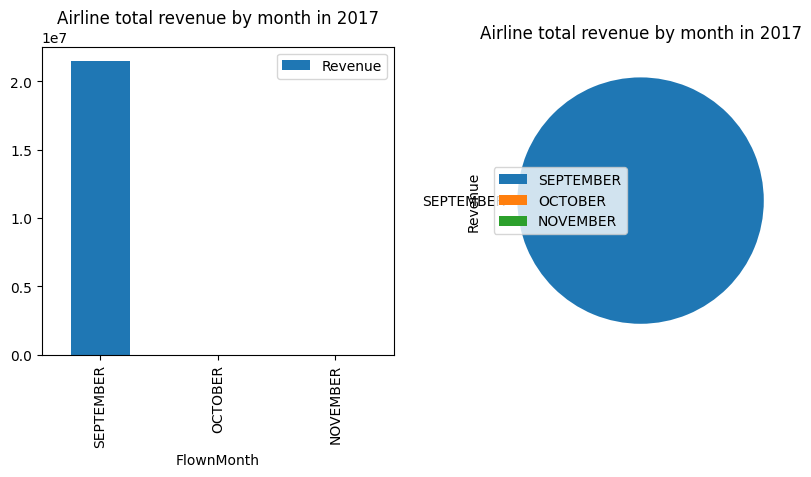

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))
df_FM.plot(y = "Revenue", kind = 'bar', title = "Airline total revenue by month in 2017", ax=ax1);
df_FM.plot(y = "Revenue", kind = 'pie', title = "Airline total revenue by month in 2017", ax=ax2);

In [19]:
print("In September, the airline earned $" + str(df_FM['Revenue']['SEPTEMBER']) +
      ", which represents a " + str(df_FM['Revenue']['SEPTEMBER']/df_FM['Revenue'].sum()*100) + "% of total revenues")
print("In October, the airline earned $" + str(df_FM['Revenue']['OCTOBER']) +
      ", which represents a " + str(df_FM['Revenue']['OCTOBER']/df_FM['Revenue'].sum()*100) + "% of total revenues")
print("In November, the airline earned $" + str(df_FM['Revenue']['NOVEMBER']) +
      ", which represents a " + str(df_FM['Revenue']['NOVEMBER']/df_FM['Revenue'].sum()*100) + "% of total revenues")

In September, the airline earned $21477703.693, which represents a 100.0% of total revenues
In October, the airline earned $nan, which represents a nan% of total revenues
In November, the airline earned $nan, which represents a nan% of total revenues


We can observe a growth in revenues over time.

Let's draw a bar chart and a pie chart of the airline's revenue, total weight, and total pieces by type of shipment.

In [20]:
df_CT = df[['CargoType', 'ChargeableWeight', 'Pieces' , 'Revenue']];
df_CT.set_index('CargoType', inplace=True);
df_CT = df_CT.groupby(['CargoType']).sum();
df_CT.head()

,ChargeableWeight,Pieces,Revenue
CargoType,,,
XXX,423637.5,3154,3.426102e+06
YYY,26767.8,841,2.467078e+06
ZZZ,16444386.6,151505,9.452727e+07


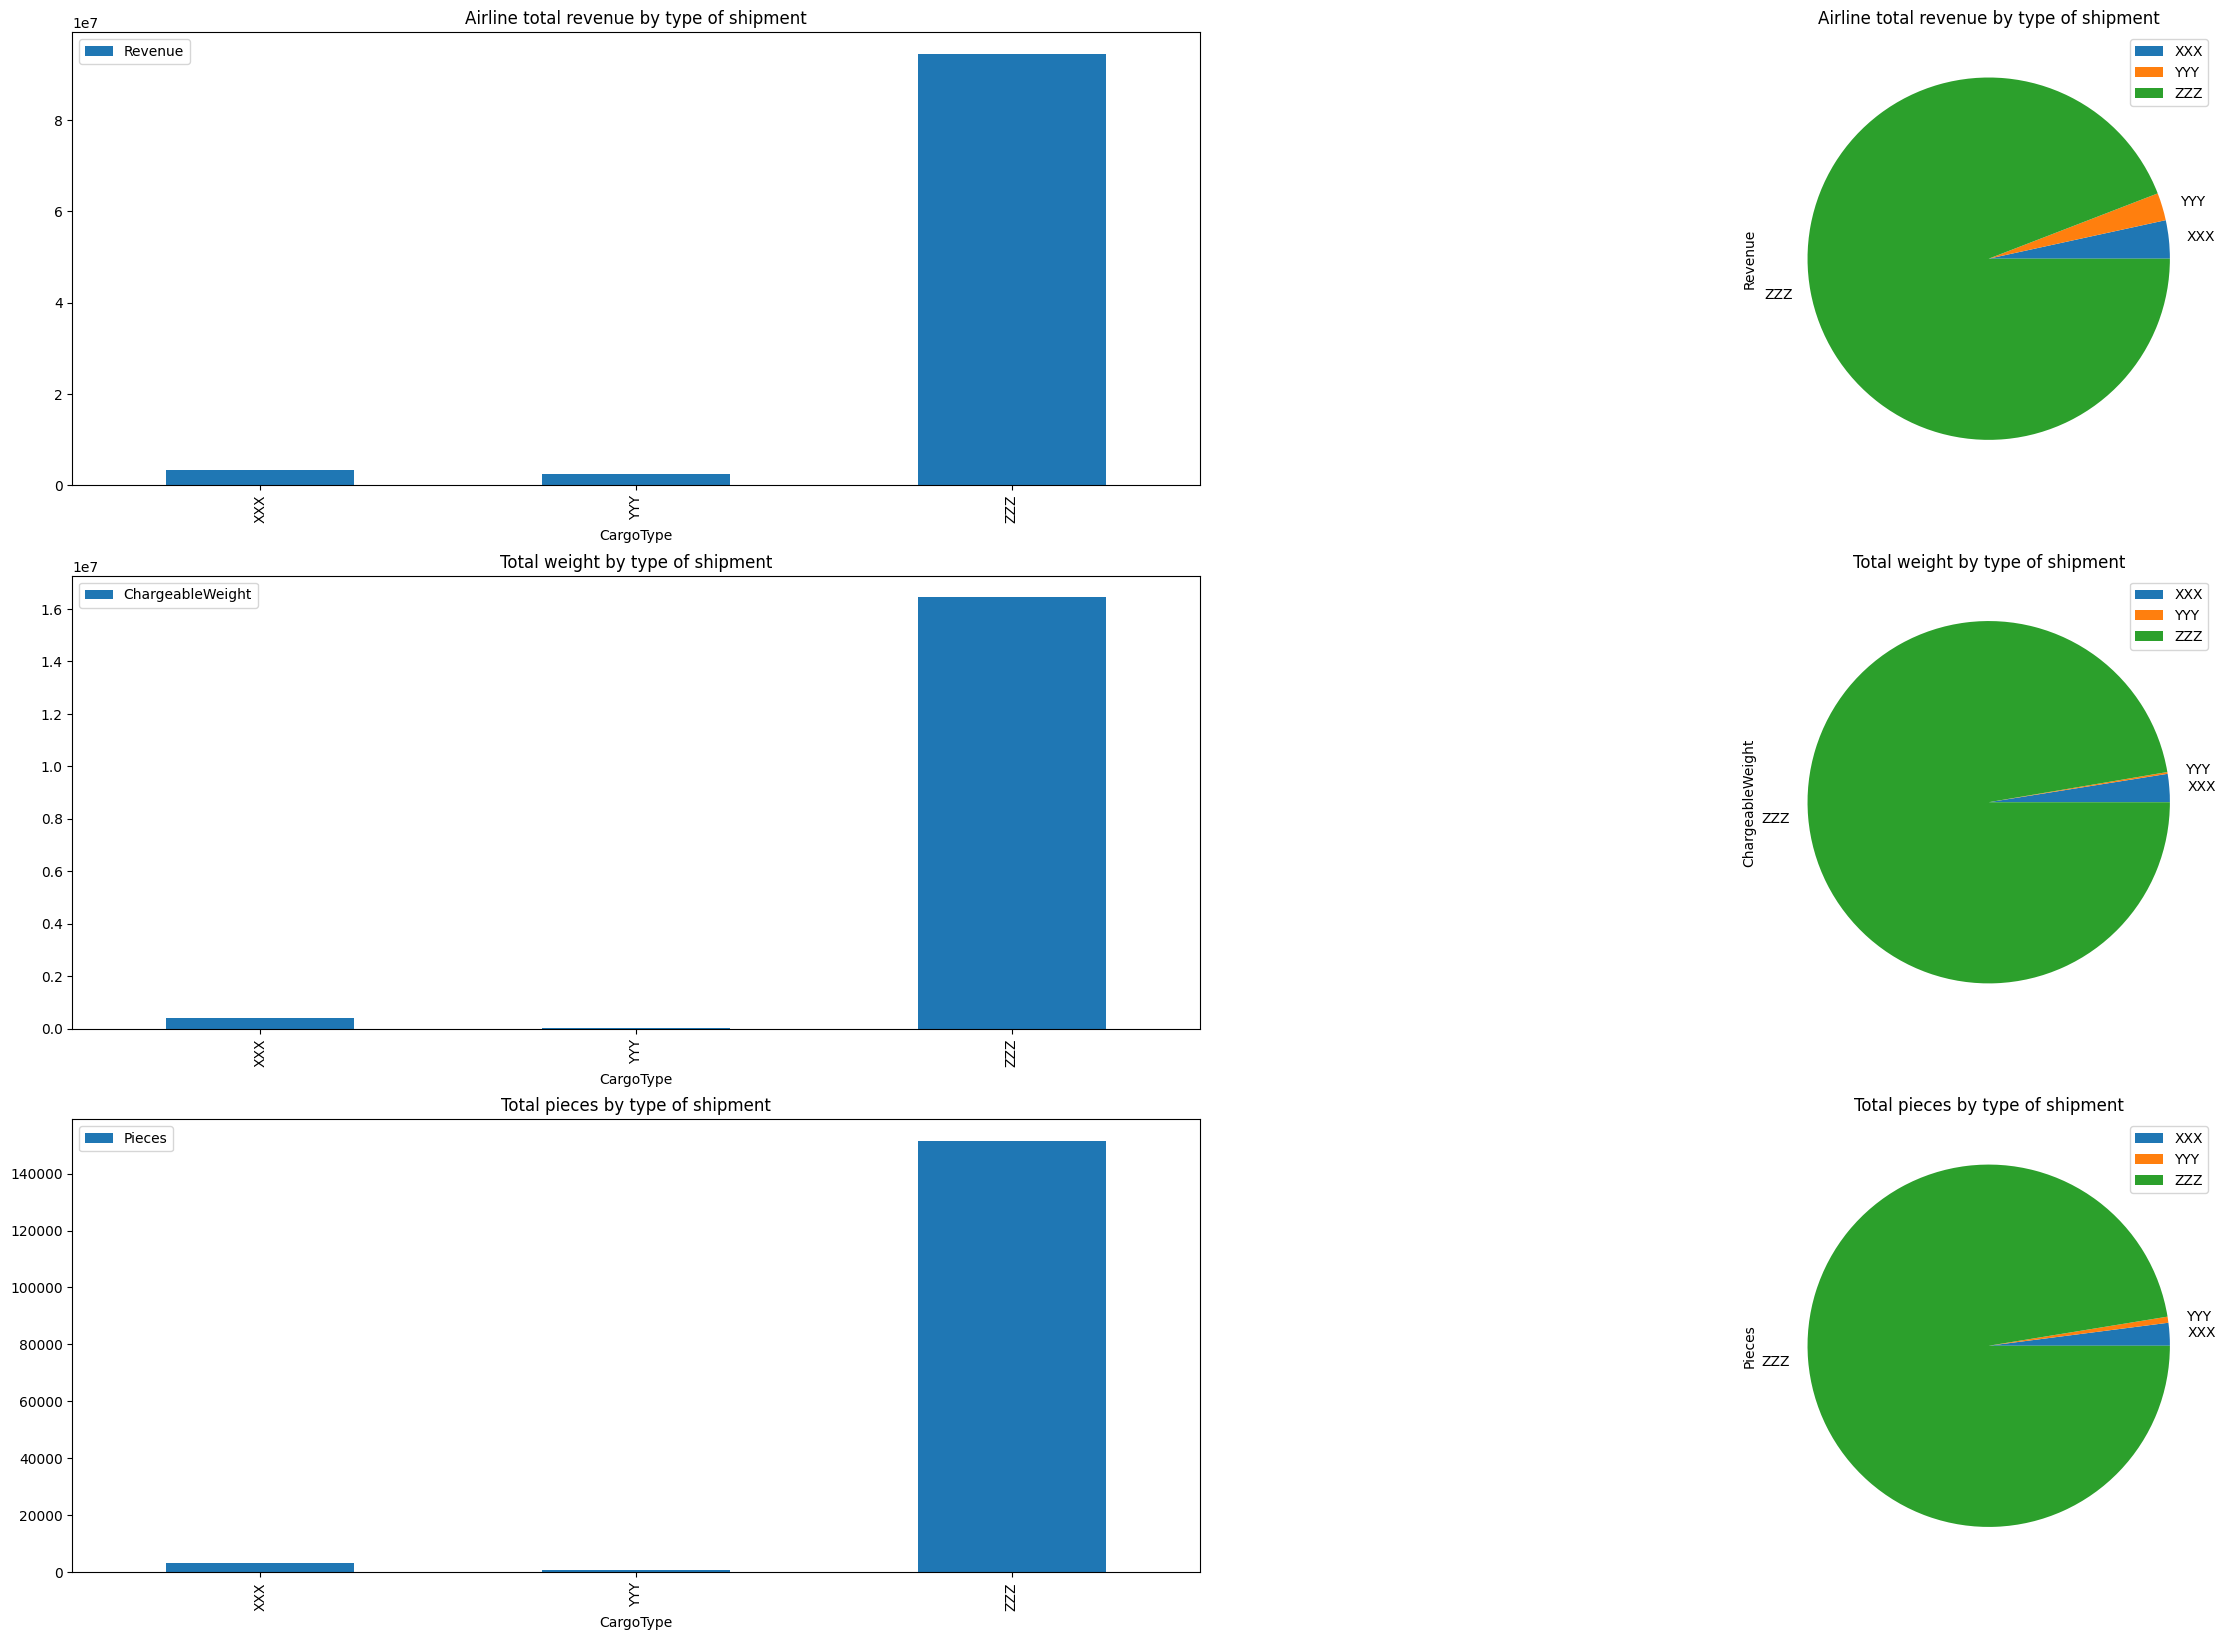

In [21]:
fig, ((ax1,ax2),(a3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(32, 20))
df_CT.plot(y = "Revenue", kind = 'bar', title = "Airline total revenue by type of shipment", ax=ax1);
df_CT.plot(y = "Revenue", kind = 'pie', title = "Airline total revenue by type of shipment", ax=ax2);
df_CT.plot(y = "ChargeableWeight", kind = 'bar', title = "Total weight by type of shipment", ax=a3);
df_CT.plot(y = "ChargeableWeight", kind = 'pie', title = "Total weight by type of shipment", ax=ax4);
df_CT.plot(y = "Pieces", kind = 'bar', title = "Total pieces by type of shipment", ax=ax5);
df_CT.plot(y = "Pieces", kind = 'pie', title = "Total pieces by type of shipment", ax=ax6);

In [22]:
print("For XXX, the airline earned $" + str(df_CT['Revenue']['XXX']) +
      ", which represents a " + str(df_CT['Revenue']['XXX']/df_CT['Revenue'].sum()*100) + "% of total revenues")
print("For YYY, the airline earned $" + str(df_CT['Revenue']['YYY']) +
      ", which represents a " + str(df_CT['Revenue']['YYY']/df_CT['Revenue'].sum()*100) + "% of total revenues")
print("For ZZZ, the airline earned $" + str(df_CT['Revenue']['ZZZ']) +
      ", which represents a " + str(df_CT['Revenue']['ZZZ']/df_CT['Revenue'].sum()*100) + "% of total revenues")

print("\n")

print("For XXX, the airline loaded " + str(df_CT['ChargeableWeight']['XXX']) +
      " kg, which represents a " + str(df_CT['ChargeableWeight']['XXX']/df_CT['ChargeableWeight'].sum()*100) + "% of the total cargo")
print("For YYY, the airline loaded " + str(df_CT['ChargeableWeight']['YYY']) +
      " kg, which represents a " + str(df_CT['ChargeableWeight']['YYY']/df_CT['ChargeableWeight'].sum()*100) + "% of the total cargo")
print("For ZZZ, the airline loaded " + str(df_CT['ChargeableWeight']['ZZZ']) +
      " kg, which represents a " + str(df_CT['ChargeableWeight']['ZZZ']/df_CT['ChargeableWeight'].sum()*100) + "% of the total cargo")

print("\n")

print("For XXX, the airline loaded " + str(df_CT['Pieces']['XXX']) +
      " pieces, which represents a " + str(df_CT['Pieces']['XXX']/df_CT['Pieces'].sum()*100) + "% of the total pieces")
print("For YYY, the airline loaded " + str(df_CT['Pieces']['YYY']) +
      " pieces, which represents a " + str(df_CT['Pieces']['YYY']/df_CT['Pieces'].sum()*100) + "% of the total pieces")
print("For ZZZ, the airline loaded " + str(df_CT['Pieces']['ZZZ']) +
      " pieces, which represents a " + str(df_CT['Pieces']['ZZZ']/df_CT['Pieces'].sum()*100) + "% of the total pieces")

print("\n")

print("For a shipment XXX, the kg is paid at $" + str(df_CT['Revenue']['XXX']/df_CT['ChargeableWeight']['XXX']) + ", and the piece at $" +
      str(df_CT['Revenue']['XXX']/df_CT['Pieces']['XXX']))
print("For a shipment YYY, the kg is paid at $" + str(df_CT['Revenue']['YYY']/df_CT['ChargeableWeight']['YYY']) + ", and the piece at $" +
      str(df_CT['Revenue']['YYY']/df_CT['Pieces']['YYY']))
print("For a shipment ZZZ, the kg is paid at $" + str(df_CT['Revenue']['ZZZ']/df_CT['ChargeableWeight']['ZZZ']) + ", and the piece at $" +
      str(df_CT['Revenue']['ZZZ']/df_CT['Pieces']['ZZZ']))

For XXX, the airline earned $3426101.54, which represents a 3.4117567144906165% of total revenues
For YYY, the airline earned $2467078.251, which represents a 2.4567487827646275% of total revenues
For ZZZ, the airline earned $94527272.976, which represents a 94.13149450274476% of total revenues


For XXX, the airline loaded 423637.5 kg, which represents a 2.5075035105936996% of the total cargo
For YYY, the airline loaded 26767.8 kg, which represents a 0.15843817525802137% of the total cargo
For ZZZ, the airline loaded 16444386.6 kg, which represents a 97.33405831414828% of the total cargo


For XXX, the airline loaded 3154 pieces, which represents a 2.0282958199356913% of the total pieces
For YYY, the airline loaded 841 pieces, which represents a 0.5408360128617363% of the total pieces
For ZZZ, the airline loaded 151505 pieces, which represents a 97.43086816720258% of the total pieces


For a shipment XXX, the kg is paid at $8.08734245669942, and the piece at $1086.271889663919
For a s

It is clear that YYY cargo is the most lucrative, followed by XXX. However, the airline's business model is based on the transportation of ZZZ cargo, as it represents more than 90% of orders and accounts for more than 90% of total revenues.

Let's draw a bar chart and a pie chart of the airline's revenue, total weight, and total pieces by code of product


In [23]:
df_PC = df[['ProductCode', 'ChargeableWeight', 'Pieces' , 'Revenue']];
df_PC.set_index('ProductCode', inplace=True);
df_PC = df_PC.groupby(['ProductCode']).sum();
df_PC.head(18)

,ChargeableWeight,Pieces,Revenue
ProductCode,,,
DLJ,11184623.1,71614,1.947279e+07
MGK,4731531.0,76887,7.292974e+07
MGV,47806.5,71,9.071101e+04
MNL,183.0,2,3.629330e+03
PCS,135.0,1,4.950000e+01
PEU,155926.5,340,1.723011e+05
RLT,4614.0,157,8.387400e+03
SDF,226.5,10,4.257500e+02
SJD,15922.5,647,3.346327e+05


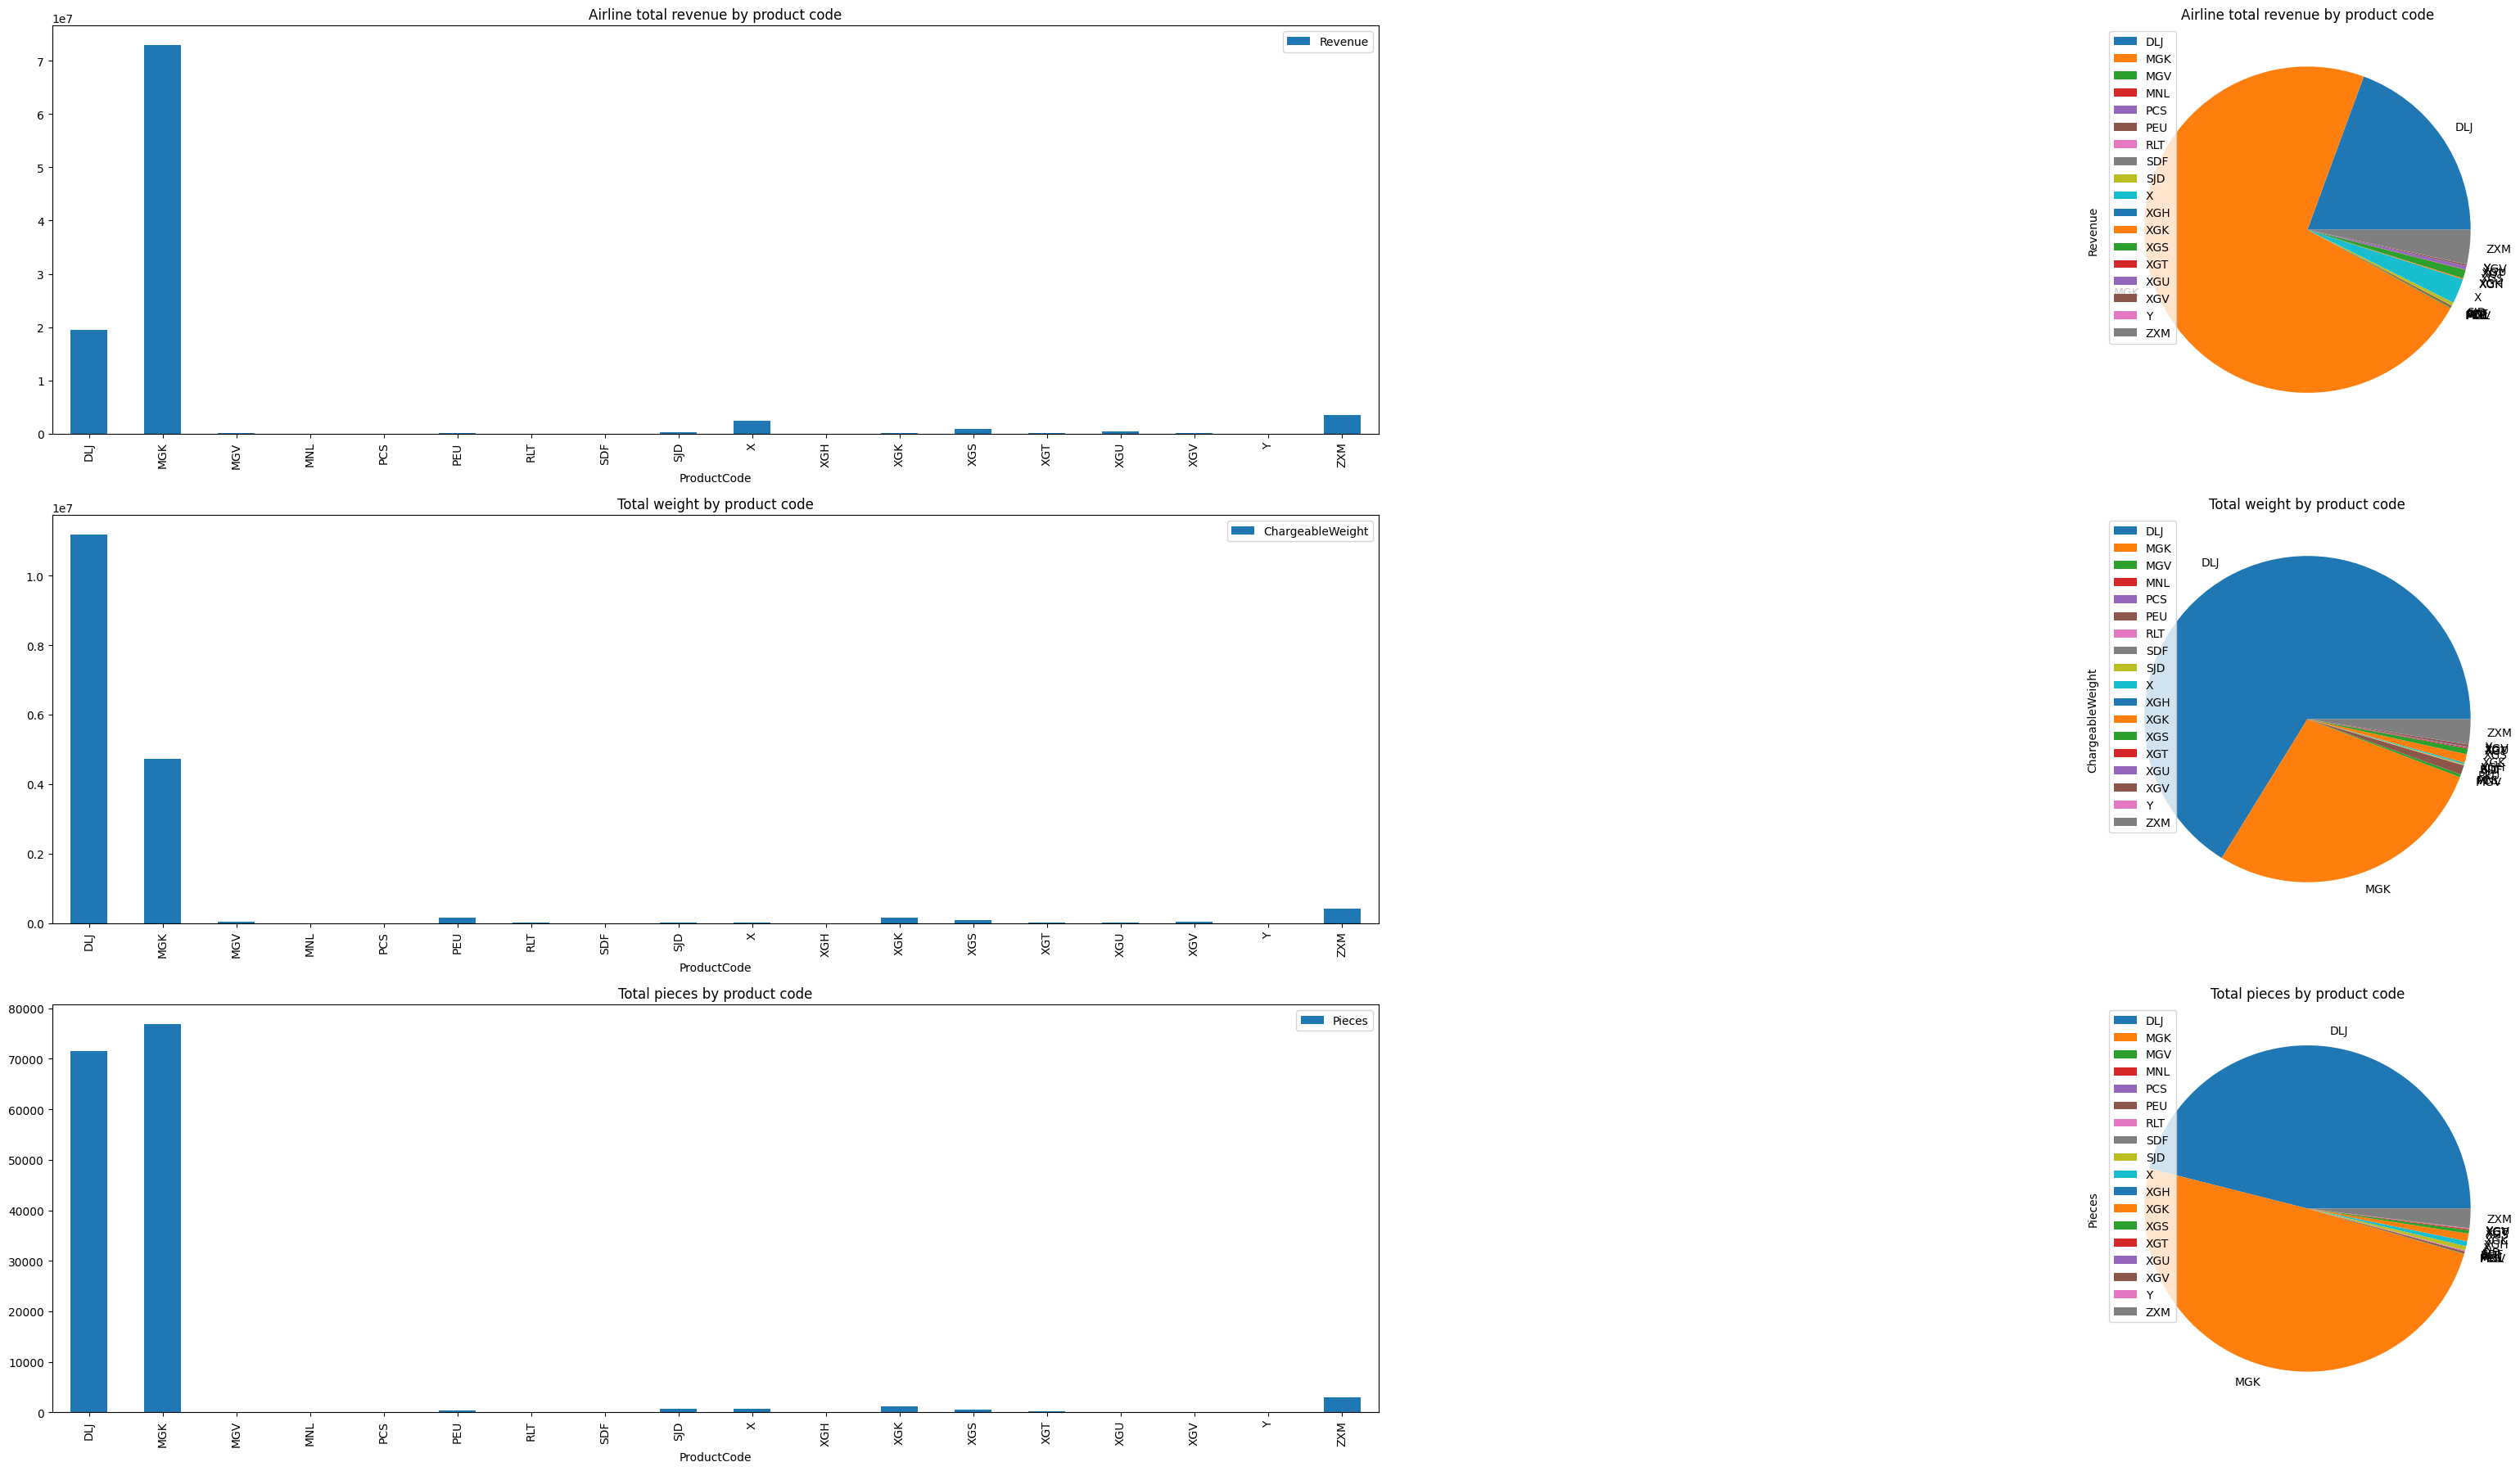

In [24]:
fig, ((ax1,ax2),(a3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(46, 22))
df_PC.plot(y = "Revenue", kind = 'bar', title = "Airline total revenue by product code", ax=ax1);
df_PC.plot(y = "Revenue", kind = 'pie', title = "Airline total revenue by product code", ax=ax2);
df_PC.plot(y = "ChargeableWeight", kind = 'bar', title = "Total weight by product code", ax=a3);
df_PC.plot(y = "ChargeableWeight", kind = 'pie', title = "Total weight by product code", ax=ax4);
df_PC.plot(y = "Pieces", kind = 'bar', title = "Total pieces by product code", ax=ax5);
df_PC.plot(y = "Pieces", kind = 'pie', title = "Total pieces by product code", ax=ax6);

There are 18 different products, so for the sake of simplicity we will choose only the 3 most representative ones, which cover more than 95%.

In [25]:
print("For DLJ, the airline earned $" + str(df_PC['Revenue']['DLJ']) +
      ", which represents a " + str(df_PC['Revenue']['DLJ']/df_PC['Revenue'].sum()*100) + "% of total revenues")
print("For MGK, the airline earned $" + str(df_PC['Revenue']['MGK']) +
      ", which represents a " + str(df_PC['Revenue']['MGK']/df_PC['Revenue'].sum()*100) + "% of total revenues")
print("For ZXM, the airline earned $" + str(df_PC['Revenue']['ZXM']) +
      ", which represents a " + str(df_PC['Revenue']['ZXM']/df_PC['Revenue'].sum()*100) + "% of total revenues")

print("\n")

print("For DLJ, the airline loaded " + str(df_PC['ChargeableWeight']['DLJ']) +
      " kg, which represents a " + str(df_PC['ChargeableWeight']['DLJ']/df_PC['ChargeableWeight'].sum()*100) + "% of the total cargo")
print("For MGK, the airline loaded " + str(df_PC['ChargeableWeight']['MGK']) +
      " kg, which represents a " + str(df_PC['ChargeableWeight']['MGK']/df_PC['ChargeableWeight'].sum()*100) + "% of the total cargo")
print("For ZXM, the airline loaded " + str(df_PC['ChargeableWeight']['ZXM']) +
      " kg, which represents a " + str(df_PC['ChargeableWeight']['ZXM']/df_PC['ChargeableWeight'].sum()*100) + "% of the total cargo")

print("\n")

print("For DLJ, the airline loaded " + str(df_PC['Pieces']['DLJ']) +
      " pieces, which represents a " + str(df_PC['Pieces']['DLJ']/df_PC['Pieces'].sum()*100) + "% of the total pieces")
print("For MGK, the airline loaded " + str(df_PC['Pieces']['MGK']) +
      " pieces, which represents a " + str(df_PC['Pieces']['MGK']/df_PC['Pieces'].sum()*100) + "% of the total pieces")
print("For ZXM, the airline loaded " + str(df_PC['Pieces']['ZXM']) +
      " pieces, which represents a " + str(df_PC['Pieces']['ZXM']/df_PC['Pieces'].sum()*100) + "% of the total pieces")

print("\n")

print("For a product DLJ, the kg is paid at $" + str(df_PC['Revenue']['DLJ']/df_PC['ChargeableWeight']['DLJ']) + ", and the piece at $" +
      str(df_PC['Revenue']['DLJ']/df_PC['Pieces']['DLJ']))
print("For a product MGK, the kg is paid at $" + str(df_PC['Revenue']['MGK']/df_PC['ChargeableWeight']['MGK']) + ", and the piece at $" +
      str(df_PC['Revenue']['MGK']/df_PC['Pieces']['MGK']))
print("For a product ZXM, the kg is paid at $" + str(df_PC['Revenue']['ZXM']/df_PC['ChargeableWeight']['ZXM']) + ", and the piece at $" +
      str(df_PC['Revenue']['ZXM']/df_PC['Pieces']['ZXM']))

For DLJ, the airline earned $19472790.516, which represents a 19.39125942917389% of total revenues
For MGK, the airline earned $72929744.345, which represents a 72.62439307480004% of total revenues
For ZXM, the airline earned $3417714.14, which represents a 3.403404431893901% of total revenues


For DLJ, the airline loaded 11184623.1 kg, which represents a 66.20160322898089% of the total cargo
For MGK, the airline loaded 4731531.0 kg, which represents a 28.005855461291596% of the total cargo
For ZXM, the airline loaded 419023.5 kg, which represents a 2.4801933192204637% of the total cargo


For DLJ, the airline loaded 71614 pieces, which represents a 46.0540192926045% of the total pieces
For MGK, the airline loaded 76887 pieces, which represents a 49.445016077170415% of the total pieces
For ZXM, the airline loaded 2997 pieces, which represents a 1.927331189710611% of the total pieces


For a product DLJ, the kg is paid at $1.7410323389439917, and the piece at $271.91318060714383
For a 

The MGK and DLJ products load a similar number of pieces, but the former weighs less than half as much as the latter and accounts for most of the revenue.

For continuous numerical variables, we will use histogram.

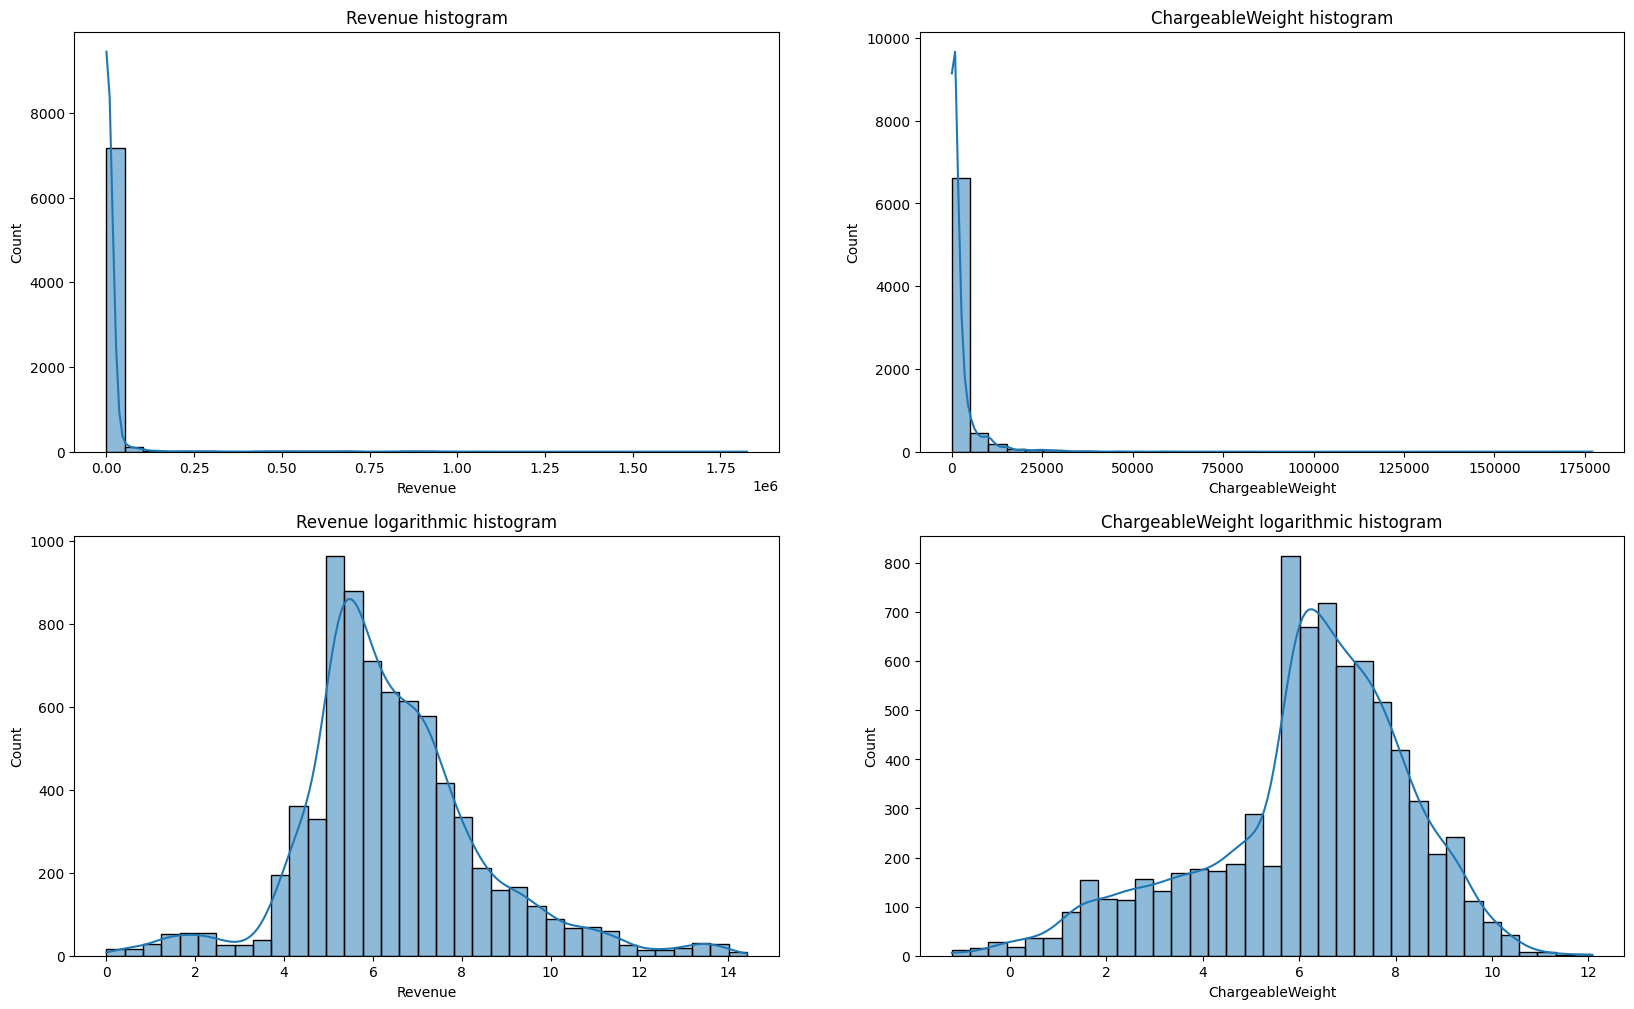

In [26]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(20, 12))
sns.histplot(df['Revenue'], kde=True, bins=35, ax=ax1).set_title("Revenue histogram")
sns.histplot(df['ChargeableWeight'], kde=True, bins=35, ax=ax2).set_title("ChargeableWeight histogram")
sns.histplot(np.log(df['Revenue'] + 1), kde=True, bins=35, ax=ax3).set_title("Revenue logarithmic histogram")
sns.histplot(np.log(df['ChargeableWeight']), kde=True, bins=35, ax=ax4).set_title("ChargeableWeight logarithmic histogram")
plt.show()

Both variables present a very wide range of values. To improve that, we can choose to re-express them on a logarithmic scale, making the distribution more symmetrical and stabilizing the variance. This is the common transformation used with right-skewed distributions.

In the case of *Revenue*, we add 1 to avoid 0 values.

However, this change of scale is only done to show the data more clearly, as the chosen model does not call for any transformation. Being a tree-based model, LightBGM does not require the normalization of features, since it only needs the absolute values for branching.

## **Statistical measures**

**Measures of central tendency**

They are the values around which the others are grouped.

Let's find out the number of clients making payments above the population mean and the population median.

In [27]:
per_ab_mean = df[df['Revenue'] > df['Revenue'].mean()].shape[0] / df.shape[0] * 100;
per_ab_median = df[df['Revenue'] > df['Revenue'].median()].shape[0] / df.shape[0] * 100;
print("The calculation of mean gives a value of $" + str(df['Revenue'].mean()) + " and that of the median $" + str(df['Revenue'].median()))
print("This implies that " + str(per_ab_median) + "% of the clients pay above the median, while only " + str(per_ab_mean) + "% pay above the mean")

The calculation of mean gives a value of $13533.753742183288 and that of the median $470.055
This implies that 50.0% of the clients pay above the median, while only 7.142857142857142% pay above the mean


Both results are tremendously different. The nature of the *Revenue* variable forces us to take the median as the measure of central tendency, since it is much more representative as it is not influenced by outliers.

**Measures of non-central tendency**

They allow the data set to be divided into equal percentage parts and are used to classify an observation.

In [28]:
print("To divide our data into four parts, we need three quartiles: \n- Q1 is $" + str(df['Revenue'].describe()[4]) +
      ", \n- Q2 is $" + str(df['Revenue'].describe()[5]) + ", and \n- Q3 is $" + str(df['Revenue'].describe()[6]))

print("\n")

print("To divide our data into ten parts, we need nine deciles: \n- D1 is $" + str(np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1))[0]) +
      ", \n- D2 is $" + str(np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1))[1]) + ", \n- D3 is $" +
      str(np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1))[2]) + ", \n- D4 is $" + str(np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1))[3]) +
      ", \n- D5 is $" + str(np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1))[4]) + ", \n- D6 is $" +
      str(np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1))[5]) + ", \n- D7 is $" + str(np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1))[6]) +
      ", \n- D8 is $" + str(np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1))[7]) + ", and \n- D9 is $" +
      str(np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1))[8]))

print("\n")

print("To divide our data into one hundred parts, we need ninety-nine percentiles: \n- P1 is $" + str(np.quantile(df['Revenue'], q = np.arange(0.01, 1, 0.01))[0]) +
      "\n - ..." + ", and \n- P99 is $" + str(np.quantile(df['Revenue'], q = np.arange(0.01, 1, 0.01))[98]))

To divide our data into four parts, we need three quartiles: 
- Q1 is $184.9375, 
- Q2 is $470.055, and 
- Q3 is $1639.3


To divide our data into ten parts, we need nine deciles: 
- D1 is $80.56, 
- D2 is $163.84, 
- D3 is $218.84100000000004, 
- D4 is $310.60800000000006, 
- D5 is $470.055, 
- D6 is $756.1279999999999, 
- D7 is $1249.0660000000003, 
- D8 is $2271.080000000002, and 
- D9 is $7996.662000000004


To divide our data into one hundred parts, we need ninety-nine percentiles: 
- P1 is $2.719
 - ..., and 
- P99 is $474265.2499999977


In [29]:
# Function that returns the quartile, decile and percentile of an observation
def getPosition(index_observation):
  return (df['Revenue'][index_observation], pd.qcut(df['Revenue'], 4, labels=False)[index_observation],
  pd.qcut(df['Revenue'], 10, labels=False)[index_observation], pd.qcut(df['Revenue'], 100, labels=False)[index_observation])

For a given index, we can find the quartile, decile, and percentile of its corresponding value

In [30]:
index = 7419
print("At index " + str(index) + ", the value $" + str(getPosition(index)[0]) + " is in:\n- Quartile " + str(getPosition(index)[1]) +
      " (from 0 to 3)\n- Decile " + str(getPosition(index)[2]) + " (from 0 to 9)\n- Percentile " + str(getPosition(index)[3]) + " (from 0 to 99)")

At index 7419, the value $315.12 is in:
- Quartile 1 (from 0 to 3)
- Decile 4 (from 0 to 9)
- Percentile 40 (from 0 to 99)


If we establish a range of thresholds based on deciles, we can know the clients willing to pay a certain price.

In [31]:
threshold = np.quantile(df['Revenue'], q = np.arange(0.1, 1, 0.1)).tolist()
list_clients_above = []
list_per_clients_above = []
list_clients_below = []
list_per_clients_below = []

for i in range(9):
  clients_above = len(df[df['Revenue'] > threshold[i]])
  per_clients_above = clients_above/len(df)
  clients_below = len(df) - clients_above
  per_clients_below = clients_below/len(df)

  list_clients_above.append(clients_above)
  list_per_clients_above.append(per_clients_above)
  list_clients_below.append(clients_below)
  list_per_clients_below.append(per_clients_below)

dict = {'threshold' : threshold,
        'Clients willing to pay' : list_clients_above,
        'Percentage willing to pay' : list_per_clients_above,
        'Clients not willing to pay' : list_clients_below,
        'Percentage not willing to pay' : list_per_clients_below}
df_deciles = pd.DataFrame(dict)
display(df_deciles)

,threshold,Clients willing to pay,Percentage willing to pay,Clients not willing to pay,Percentage not willing to pay
0,80.560,6662,0.897844,758,0.102156
1,163.840,5921,0.797978,1499,0.202022
2,218.841,5194,0.700000,2226,0.300000
3,310.608,4452,0.600000,2968,0.400000
4,470.055,3710,0.500000,3710,0.500000
5,756.128,2968,0.400000,4452,0.600000
6,1249.066,2226,0.300000,5194,0.700000
7,2271.080,1484,0.200000,5936,0.800000
8,7996.662,742,0.100000,6678,0.900000


Let's check if there is a correlation between the numeric variables.

In [32]:
df.corr()

<ipython-input-32-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ChargeableWeight,Pieces,Revenue
ChargeableWeight,1.000000,0.317356,0.072400
Pieces,0.317356,1.000000,0.072934
Revenue,0.072400,0.072934,1.000000


*Pieces* and *ChargeableWeight* would be at the limit of a low positive correlation. However, we can assume that correlations are negligible. As a consequence, the variables are not linearly dependent.

**Measures of dispersion**

Since we have taken the median as the measure of central tendency, the appropriate measure of dispersion is the interquartile range.

In [33]:
for i in df[numeric_variables]:
  print("For variable " + i + ", IQR is " + str(df[i].quantile(0.75) - df[i].quantile(0.25)))

For variable ChargeableWeight, IQR is 1821.0
For variable Pieces, IQR is 13.0
For variable Revenue, IQR is 1454.3625


This implies that 50% of the *ChargeableWeight* values have a spread of 1821 kg. This is followed by *Revenue*, with $1454.3625 of spread. Finally, *Pieces* is 13 units of spread.

**Mesaures of shape**

We will use skewness to check the amount and direction of departure from horizontal symmetry, and kurtosis to check how tall and sharp the central peak is, relative to a standard bell curve.

In [34]:
for i in df[numeric_variables]:
  print("Skewness in " + i + " is " + str(skew(df[i], axis=0, bias=True)))

Skewness in ChargeableWeight is 11.792722407181122
Skewness in Pieces is 9.600357155036885
Skewness in Revenue is 10.429624675588295


Skewness greater than zero implies positive asymmetry, so that the three distributions are right-skewed.

In other words: the tail of data points away from the median is on the right side of the distribution.

In [35]:
for i in df[numeric_variables]:
  print("Kurtosis in " + i + " is " + str(kurtosis(df[i], axis=0, bias=True)))

Kurtosis in ChargeableWeight is 242.04441297274664
Kurtosis in Pieces is 153.4183720147306
Kurtosis in Revenue is 125.14704732375074


Kurtosis greater than three is called leptokurtic, so that the three distributions are heavy-tailed in respect of the normal distribution.

# **Predictive statistics**

We chose LightGBM, a gradient-boosting framework developed by Microsoft, because of its advantages such as faster training speed, higher efficiency and lower memory usage. This model is based on decision tree algorithms and used for ranking, classification and regression.

Let's define the input and output feature and split our dataset into three sets: train, validation, and test.
The first one will have 75% of the data and will be used for training. The second one will have 15% and will be used to evaluate the model performance during training. The third one will have the remaining 10% and will be used to test the performance of our trained model.

To prevent the predictions from containing negative values, we have to transform the variable *Revenue*. Since it contains zeros, we decided to replace those values where the logarithm is not defined by the minimum non-0 value. In this case, 0.095.

In [37]:
X = df.drop(['Revenue'],axis=1)
df.loc[df['Revenue'] == 0, 'Revenue'] = df[df['Revenue'] > 0]['Revenue'].min()
y = np.log(df['Revenue'])

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=5)

We set the default loss function used by LGBMRegressor, the L2-norm known as least squares. Its calculation consists of the sum of the square of the differences between the target value and the estimated value, so the objective of this loss function is to minimize the discrepancy between the predictions and the actual values.

In [39]:
model = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=5)
model.fit(X_train, y_train, eval_set=[(X_val,y_val)], verbose=20,eval_metric='l2')

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[20]	valid_0's l2: 0.391523
[40]	valid_0's l2: 0.178161
[60]	valid_0's l2: 0.143487
[80]	valid_0's l2: 0.129257
[100]	valid_0's l2: 0.124808


LGBMRegressor(learning_rate=0.09, max_depth=-5, random_state=5)

Once our model has been trained, let's check the coefficient of determination R$^2$ for the different subsets. That is, the proportion of the variation in the dependent variable that is predictable from the independent variables.

In [41]:
# In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points
print('The training coefficient of determination is {:.4f}'.format(model.score(X_train,y_train)))
print('The validation coefficient of determination is {:.4f}'.format(model.score(X_val,y_val)))
print('The testing coefficient of determination is {:.4f}'.format(model.score(X_test,y_test)))

The training coefficient of determination is 0.9847
The validation coefficient of determination is 0.9710
The testing coefficient of determination is 0.9749


The model helps to predict 98.47% of *Revenue* for the training set, 97.10% for the validation set, and 97.49% for the testing set.

We can graphically represent the contribution of each feature to the model prediction.

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

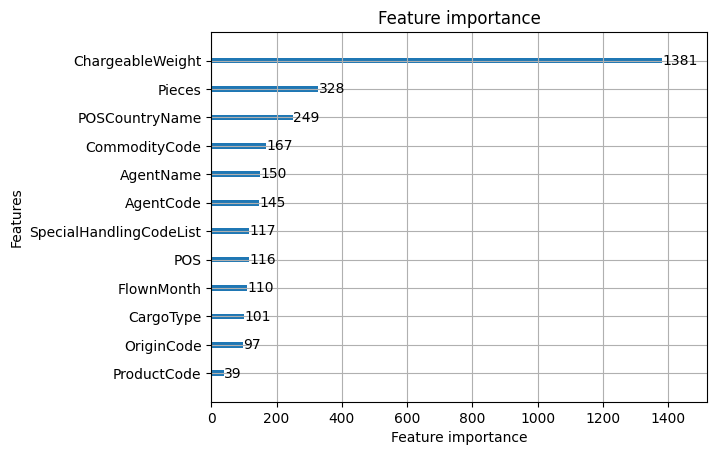

In [42]:
lgb.plot_importance(model)

We see that the *ChargeableWeight* variable has a much higher influence in the model than the rest. We can calculate the feature importance ratio of each variable as follows:

In [65]:
feature_importance = {'ChargeableWeight':1381, 'Pieces':328, 'POSCountryName':249, 'CommodityCode':167, 'AgentName':150, 'AgentCode':145,
                      'SpecialHandlingCodeList':117, 'POS':116, 'FlownMonth':110, 'CargoType':101, 'OriginCode':97, 'ProductCode':39}

for key, value in feature_importance.items():
  print(str(key) + " has a " + str(value/sum(feature_importance.values())) + " ratio")

ChargeableWeight has a 0.4603333333333333 ratio
Pieces has a 0.10933333333333334 ratio
POSCountryName has a 0.083 ratio
CommodityCode has a 0.05566666666666667 ratio
AgentName has a 0.05 ratio
AgentCode has a 0.04833333333333333 ratio
SpecialHandlingCodeList has a 0.039 ratio
POS has a 0.03866666666666667 ratio
FlownMonth has a 0.03666666666666667 ratio
CargoType has a 0.033666666666666664 ratio
OriginCode has a 0.03233333333333333 ratio
ProductCode has a 0.013 ratio


When it comes to verifying how well a Machine Learning model learns and generalizes to new data, three scenarios are possible that we can separate by looking at the loss function.



*   Appropriate-fitting: the curve decreases rapidly at first and then stabilizes as the model converges to an optimal solution.
*   Underfitting: the model is not sufficiently complex to capture the relationships present in the data. The curve may show a gradual and steady decline, without ever stabilizing at a minimum. This indicates that the model cannot capture the variability of the data.
*   Overfitting: the model is too complex and has memorized noise or specific details of the training data. The curve may show a sharp decrease in loss initially, but will then begin to increase as the model over-fits the training data and loses generalizability.



The loss function in the validation set is shown below.

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

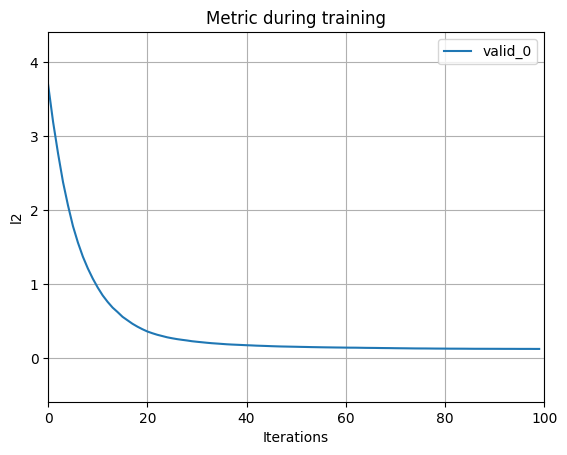

In [67]:
lgb.plot_metric(model)

The graph indicates that we are in the first scenario, as the curve stabilizes at a value close to zero. Thus, we can rule out problems of overfitting and underfitting.

Next, we superimpose the distribution of the test set on the distribution of the set of predictions to compare them with each other.

Note: earlier we applied the logarithmic transformation to the *Revenue* variable, so we must apply the exponential to obtain the initial scale.

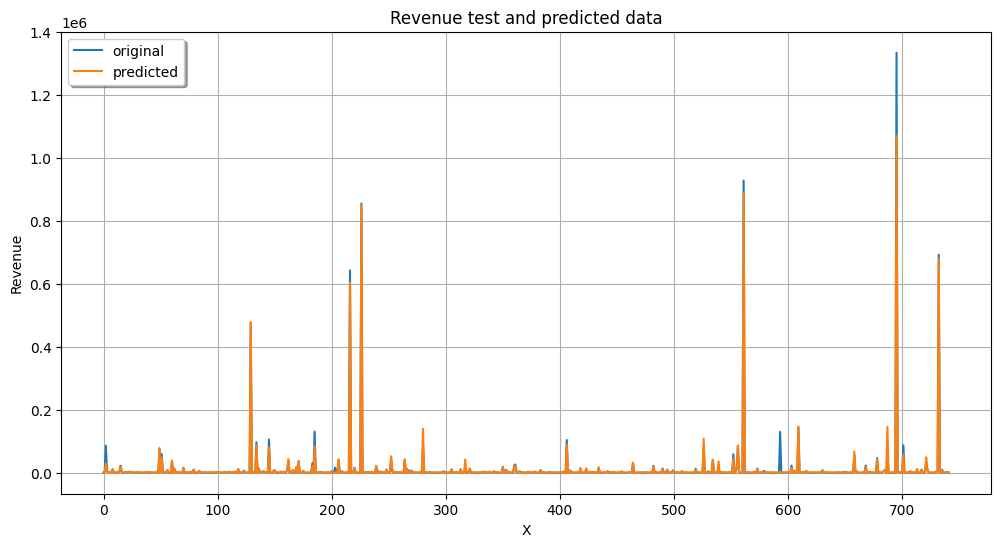

In [72]:
y_pred = model.predict(X_test)

x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, np.exp(y_test), label="original")
plt.plot(x_ax, np.exp(y_pred), label="predicted")
plt.title("Revenue test and predicted data")
plt.xlabel('X')
plt.ylabel('Revenue')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

We see that they are virtually identical, except that the prediction distribution does not reach some of the more extreme outliers.

It is worth mentioning that the fact that both distributions are similar does not necessarily imply that the predictions are correct, so it is crucial to consider other evaluation metrics.

To evaluate the performance of the model, we will use the following two metrics:

*   MSE stands for Mean Square Error. It is the average of L2.
*   RMSE stands for Root-Mean-Square Error. It is the square root of MSE.

Both measure the difference between predictions and actual values, with the advantage that the latter is calculated in the same unit as the target variable. For this reason, we will pay special attention to RMSE.

Note: earlier we applied the logarithmic transformation to the *Revenue* variable, so we must apply the exponential to obtain the initial scale.

In [73]:
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 150668713.67
RMSE: 12274.72


The RMSE must be evaluated in terms of magnitude. Since the *Revenue* variable contains very high values, a priori $12,274.72 does not seem a bad score.

One way to interpret it better is to compare our model with another. To do this, let us assume a trivial model whose predictions are the median of the original variable.

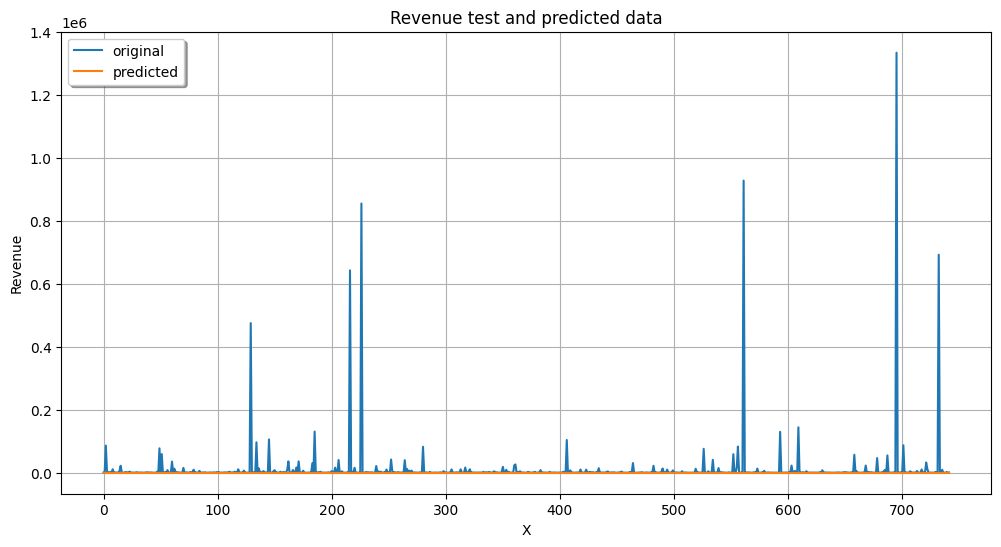

In [83]:
y_trivial = np.array([])
for i in range (len(y_test)):
  y_trivial = np.append(y_trivial, np.log(df['Revenue'].median()))

x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, np.exp(y_test), label="original")
plt.plot(x_ax, np.exp(y_trivial), label="predicted")
plt.title("Revenue test and predicted data")
plt.xlabel('X')
plt.ylabel('Revenue')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

As we can see, both distributions are nothing alike.

In [85]:
mse = mean_squared_error(np.exp(y_test), y_trivial)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 6272761734.24
RMSE: 79200.77


The RMSE score of the trivial model is $79,200.77

This implies that our model reduces the RMSE by approximately 84.5% with respect to the trivial model.